<a href="https://colab.research.google.com/github/Kyawhtin21501/CCC_project/blob/main/data_tra/sale_pre.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
uploaded = files.upload()  # 📤 ファイル選択画面が出る


Saving kaggle (1).json to kaggle (1).json


In [2]:
# Install dependencies as needed:
# pip install kagglehub[pandas-datasets]
import kagglehub
from kagglehub import KaggleDatasetAdapter
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# Set the path to the file you'd like to load
file_path = "Balaji Fast Food Sales.csv"

# Load the latest version
df = kagglehub.load_dataset(
  KaggleDatasetAdapter.PANDAS,
  "rajatsurana979/fast-food-sales-report",
  file_path,
  # Provide any additional arguments like
  # sql_query or pandas_kwargs. See the
  # documenation for more information:
  # https://github.com/Kaggle/kagglehub/blob/main/README.md#kaggledatasetadapterpandas
)

print("First 5 records:", df.head())

/tmp/ipython-input-931071278.py:13: DeprecationWarning: Use dataset_load() instead of load_dataset(). load_dataset() will be removed in a future version.
  df = kagglehub.load_dataset(


100%|██████████| 61.0k/61.0k [00:00<00:00, 39.9MB/s]

First 5 records:    order_id        date        item_name  item_type  item_price  quantity  \
0         1  07-03-2022         Aalopuri   Fastfood          20        13   
1         2   8/23/2022          Vadapav   Fastfood          20        15   
2         3  11/20/2022          Vadapav   Fastfood          20         1   
3         4  02-03-2023  Sugarcane juice  Beverages          25         6   
4         5  10-02-2022  Sugarcane juice  Beverages          25         8   

   transaction_amount transaction_type received_by time_of_sale  
0                 260              NaN         Mr.        Night  
1                 300             Cash         Mr.    Afternoon  
2                  20             Cash         Mr.    Afternoon  
3                 150           Online         Mr.        Night  
4                 200           Online         Mr.      Evening  


In [3]:
df.head()

,order_id,date,item_name,item_type,item_price,quantity,transaction_amount,transaction_type,received_by,time_of_sale
0,1,07-03-2022,Aalopuri,Fastfood,20,13,260,NaN,Mr.,Night
1,2,8/23/2022,Vadapav,Fastfood,20,15,300,Cash,Mr.,Afternoon
2,3,11/20/2022,Vadapav,Fastfood,20,1,20,Cash,Mr.,Afternoon
3,4,02-03-2023,Sugarcane juice,Beverages,25,6,150,Online,Mr.,Night
4,5,10-02-2022,Sugarcane juice,Beverages,25,8,200,Online,Mr.,Evening


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   order_id            1000 non-null   int64 
 1   date                1000 non-null   object
 2   item_name           1000 non-null   object
 3   item_type           1000 non-null   object
 4   item_price          1000 non-null   int64 
 5   quantity            1000 non-null   int64 
 6   transaction_amount  1000 non-null   int64 
 7   transaction_type    893 non-null    object
 8   received_by         1000 non-null   object
 9   time_of_sale        1000 non-null   object
dtypes: int64(4), object(6)
memory usage: 78.3+ KB


In [5]:
from dateutil import parser

df['date'] = df['date'].apply(lambda x: parser.parse(x))



In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   order_id            1000 non-null   int64         
 1   date                1000 non-null   datetime64[ns]
 2   item_name           1000 non-null   object        
 3   item_type           1000 non-null   object        
 4   item_price          1000 non-null   int64         
 5   quantity            1000 non-null   int64         
 6   transaction_amount  1000 non-null   int64         
 7   transaction_type    893 non-null    object        
 8   received_by         1000 non-null   object        
 9   time_of_sale        1000 non-null   object        
dtypes: datetime64[ns](1), int64(4), object(5)
memory usage: 78.3+ KB


In [7]:
from pydoc import replace
df = df.sort_values(by='date')



In [8]:
df.head(10)

,order_id,date,item_name,item_type,item_price,quantity,transaction_amount,transaction_type,received_by,time_of_sale
690,691,2022-04-01,Sandwich,Fastfood,60,7,420,Cash,Mrs.,Evening
622,623,2022-04-02,Cold coffee,Beverages,40,15,600,Cash,Mr.,Midnight
571,572,2022-04-02,Sandwich,Fastfood,60,15,900,Cash,Mr.,Afternoon
519,520,2022-04-03,Panipuri,Fastfood,20,11,220,Online,Mrs.,Night
412,413,2022-04-03,Aalopuri,Fastfood,20,10,200,Online,Mrs.,Midnight
393,394,2022-04-03,Sandwich,Fastfood,60,1,60,Cash,Mrs.,Morning
604,605,2022-04-04,Cold coffee,Beverages,40,15,600,NaN,Mrs.,Afternoon
509,510,2022-04-04,Sandwich,Fastfood,60,14,840,Online,Mr.,Afternoon
333,334,2022-04-04,Cold coffee,Beverages,40,4,160,Cash,Mrs.,Evening
905,906,2022-04-04,Sandwich,Fastfood,60,15,900,Cash,Mr.,Afternoon


In [9]:
df.drop(columns=["order_id","item_name","item_type","item_price","quantity","transaction_type"],inplace=True)

In [10]:
df.head()
df.reset_index(drop=True,inplace=True)

In [11]:
df.head()
df.isnull().sum()


,0
date,0
transaction_amount,0
received_by,0
time_of_sale,0


In [12]:
df.drop(columns= ["received_by","time_of_sale"],axis=1,inplace=True)


In [13]:
df.head()

,date,transaction_amount
0,2022-04-01,420
1,2022-04-02,600
2,2022-04-02,900
3,2022-04-03,220
4,2022-04-03,200


In [14]:
grouped_df = df.groupby('date')['transaction_amount'].mean()
grouped_df = pd.DataFrame(grouped_df)




print(grouped_df.head())


            transaction_amount
date                          
2022-04-01               420.0
2022-04-02               750.0
2022-04-03               160.0
2022-04-04               625.0
2022-04-05               100.0


In [15]:
display(grouped_df)

,transaction_amount
date,
2022-04-01,420.000000
2022-04-02,750.000000
2022-04-03,160.000000
2022-04-04,625.000000
2022-04-05,100.000000
...,...
2023-03-25,280.000000
2023-03-26,93.333333
2023-03-27,260.000000


In [16]:
df = grouped_df

In [25]:
df['transaction_amount'] = df["transaction_amount"] * 1.5

In [26]:
df.reset_index(inplace=True)
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 348 entries, 0 to 347
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   index               348 non-null    int64         
 1   date                348 non-null    datetime64[ns]
 2   transaction_amount  348 non-null    float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 8.3 KB


<Axes: xlabel='date', ylabel='transaction_amount'>

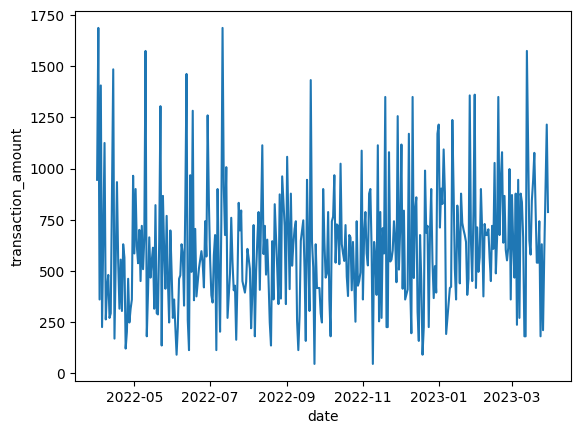

In [27]:
sns.lineplot(data=df,x="date",y="transaction_amount")

In [28]:
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['day'] = df['date'].dt.day


df['weekday'] = df['date'].dt.weekday


df['weekday_name'] = df['date'].dt.day_name()

In [30]:
df.head(10)

,index,date,transaction_amount,year,month,day,weekday,weekday_name
0,0,2022-04-01,945.00,2022,4,1,4,Friday
1,1,2022-04-02,1687.50,2022,4,2,5,Saturday
2,2,2022-04-03,360.00,2022,4,3,6,Sunday
3,3,2022-04-04,1406.25,2022,4,4,0,Monday
4,4,2022-04-05,225.00,2022,4,5,1,Tuesday
5,5,2022-04-07,1125.00,2022,4,7,3,Thursday
6,6,2022-04-08,262.50,2022,4,8,4,Friday
7,7,2022-04-09,416.25,2022,4,9,5,Saturday
8,8,2022-04-10,480.00,2022,4,10,6,Sunday
9,9,2022-04-11,270.00,2022,4,11,0,Monday


In [32]:
weekday_day_grouped = df.groupby('weekday_name')['transaction_amount'].mean()
weekday_day_grouped = pd.DataFrame(weekday_day_grouped)
weekday_day_grouped.reset_index(inplace=True)
weekday_day_grouped


,weekday_name,transaction_amount
0,Friday,574.065536
1,Monday,661.310587
2,Saturday,589.633413
3,Sunday,624.431197
4,Thursday,658.485241
5,Tuesday,647.642952
6,Wednesday,567.643393


<Axes: xlabel='weekday_name', ylabel='transaction_amount'>

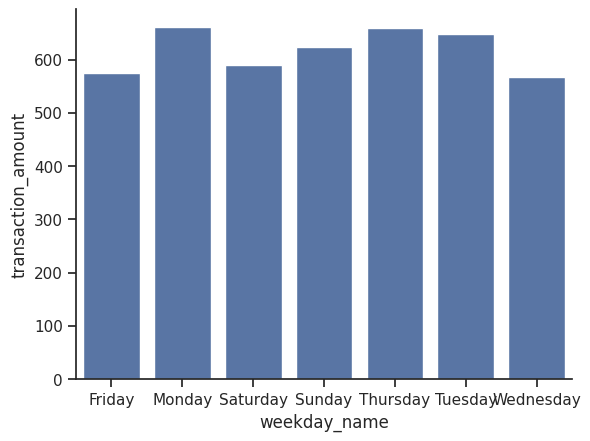

In [39]:


custom_params = {"axes.spines.right": False, "axes.spines.top": False}
sns.set_theme(style="ticks", rc=custom_params)
sns.barplot(x=weekday_day_grouped['weekday_name'], y=weekday_day_grouped['transaction_amount'])

In [40]:
month_group_df = df.groupby('month')['transaction_amount'].mean()
month_group_df = pd.DataFrame(month_group_df)
month_group_df.reset_index(inplace=True)
month_group_df

,month,transaction_amount
0,1,727.060345
1,2,704.240434
2,3,690.626232
3,4,578.169643
4,5,595.194556
5,6,582.778770
6,7,578.868750
7,8,549.782328
8,9,557.205357
9,10,603.765625


<Axes: xlabel='month', ylabel='transaction_amount'>

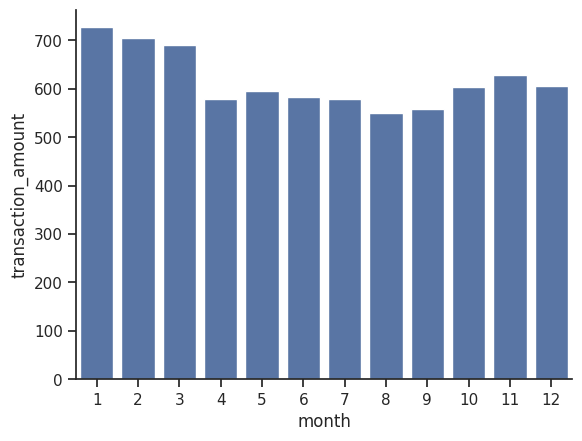

In [41]:
custom_params = {"axes.spines.right": False, "axes.spines.top": False}
sns.set_theme(style="ticks", rc=custom_params)
sns.barplot(x=month_group_df['month'], y=month_group_df['transaction_amount'])